In [ ]:
#Description: This program uses the Money Flow Index to determine when to buy and sell stock

In [ ]:
#Import the libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [ ]:
#Load the tesla stock data
from google.colab import files
files.upload()

Saving TSLA.csv to TSLA.csv


{'TSLA.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2016-07-22,44.397999,44.900002,43.776001,44.453999,44.453999,12898500\n2016-07-25,44.453999,46.278000,44.273998,46.001999,46.001999,22453500\n2016-07-26,45.537998,46.000000,45.060001,45.902000,45.902000,17150000\n2016-07-27,45.868000,46.672001,45.383999,45.698002,45.698002,14445000\n2016-07-28,45.590000,46.152000,45.320000,46.122002,46.122002,12095500\n2016-07-29,46.139999,47.056000,46.048000,46.958000,46.958000,15354000\n2016-08-01,47.099998,47.326000,45.875999,46.001999,46.001999,20081500\n2016-08-02,45.874001,45.973999,44.279999,45.439999,45.439999,19672000\n2016-08-03,45.473999,45.939999,44.841999,45.158001,45.158001,19439000\n2016-08-04,45.138000,46.172001,44.410000,46.122002,46.122002,20735000\n2016-08-05,46.000000,46.400002,45.480000,46.006001,46.006001,16026000\n2016-08-08,45.599998,45.919998,45.217999,45.231998,45.231998,11318000\n2016-08-09,45.363998,46.307999,45.330002,45.816002,45.816002,11039000\n2016-08-10,45.64799

In [ ]:
#Get the data
df = pd.read_csv('TSLA.csv')
#Set the index
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2016-07-22,2016-07-22,44.397999,44.900002,43.776001,44.453999,44.453999,12898500
2016-07-25,2016-07-25,44.453999,46.278000,44.273998,46.001999,46.001999,22453500
2016-07-26,2016-07-26,45.537998,46.000000,45.060001,45.902000,45.902000,17150000
2016-07-27,2016-07-27,45.868000,46.672001,45.383999,45.698002,45.698002,14445000
2016-07-28,2016-07-28,45.590000,46.152000,45.320000,46.122002,46.122002,12095500
...,...,...,...,...,...,...,...
2021-07-15,2021-07-15,658.390015,666.140015,637.880005,650.599976,650.599976,20209600
2021-07-16,2021-07-16,654.679993,656.700012,642.200012,644.219971,644.219971,16339800
2021-07-19,2021-07-19,629.890015,647.200012,621.289978,646.219971,646.219971,21297100
2021-07-20,2021-07-20,651.989990,662.390015,640.500000,660.500000,660.500000,15442700


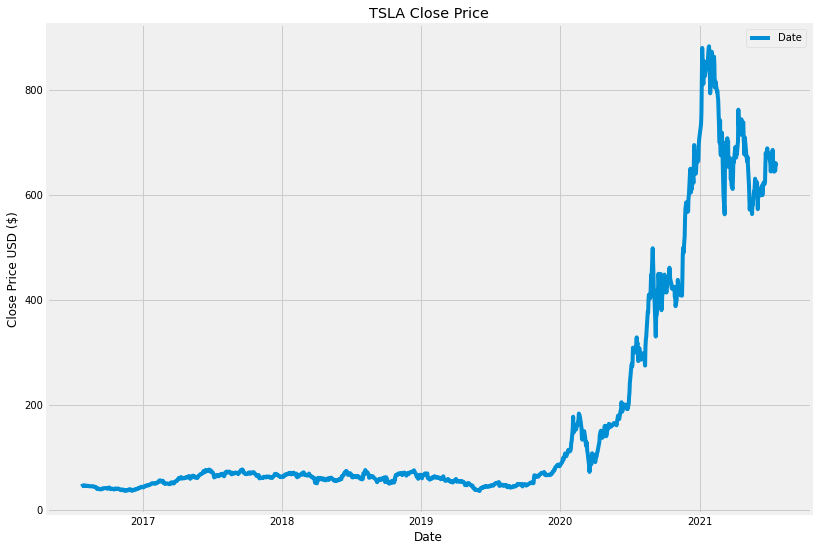

In [ ]:
#Visually show the data
plt.figure(figsize=(12.2, 9))
plt.plot(df['Close'], label='Close Price')
plt.title('TSLA Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(df.columns.values, loc='upperleft')
plt.show()

In [ ]:
#Calculate the typical price
typical_price = (df['Close'] + df['High'] + df['Low']) / 3
typical_price

2016-07-22     44.376667
2016-07-25     45.517999
2016-07-26     45.654000
2016-07-27     45.918001
2016-07-28     45.864667
                 ...    
2021-07-15    651.539999
2021-07-16    647.706665
2021-07-19    638.236654
2021-07-20    654.463338
2021-07-21    656.813314
Length: 1258, dtype: float64

In [ ]:
#Get the period (Note Money Flow Index Use the period of 14 days)
period = 14

In [ ]:
#Calculate the money flow
money_flow = typical_price = df['Volume']
money_flow

2016-07-22    12898500
2016-07-25    22453500
2016-07-26    17150000
2016-07-27    14445000
2016-07-28    12095500
                ...   
2021-07-15    20209600
2021-07-16    16339800
2021-07-19    21297100
2021-07-20    15442700
2021-07-21    13910800
Name: Volume, Length: 1258, dtype: int64

In [ ]:
#Get all of the positive and negative money flows
positive_flow = []
negative_flow = []

#Loop through the typical price
for i in range(1, len(typical_price)):
  if typical_price[i] > typical_price[i-1]:
    positive_flow.append(money_flow[i-1])
    negative_flow.append(0)
  elif typical_price[i] < typical_price[i-1]:
    negative_flow.append(money_flow[i-1])
    positive_flow.append(0)
  else:
    positive_flow.append(0)
    negative_flow.append(0)
  

In [ ]:
#Get all of the positive and negative money flows within the time period
positive_mf = []
negative_mf = []

for i in range(period-1, len(positive_flow)):
  positive_mf.append( sum(positive_flow[i + 1-period : i+1]))

for i in range(period-1, len(negative_flow)):
  negative_mf.append( sum(negative_flow[i + 1-period : i+1]))

In [ ]:
#Calculate the money flow index
mfi = 100 * (np.array(positive_mf) / (np.array(positive_mf) + np.array(negative_mf) ))
mfi

array([31.56259957, 26.22287006, 32.28386867, ..., 37.79276552,
       37.83571534, 32.08330036])

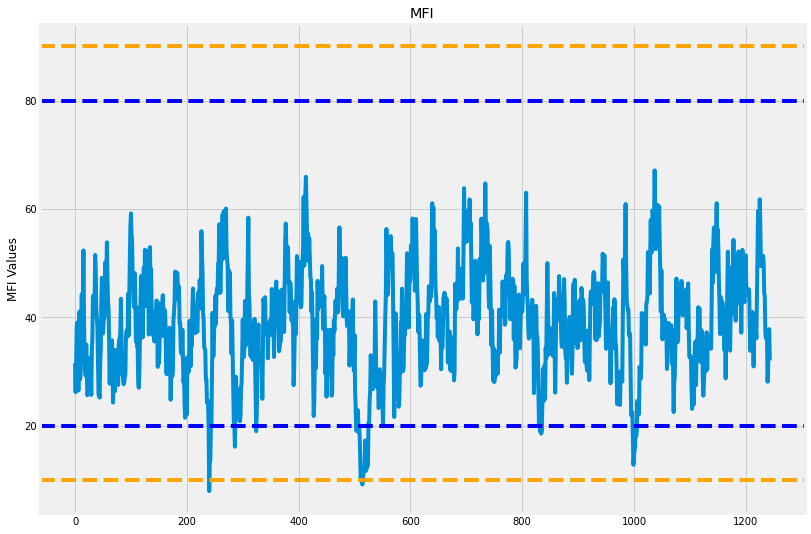

In [ ]:
#Visually show the MFI
df2 = pd.DataFrame()
df2['MFI'] = mfi
#Create the plot

plt.figure(figsize=(12.2, 9))
plt.plot(df2['MFI'], label='MFI')
plt.axhline(10, linestyle= '--', color = 'orange')
plt.axhline(20, linestyle= '--', color = 'blue')
plt.axhline(80, linestyle= '--', color = 'blue')
plt.axhline(90, linestyle= '--', color = 'orange')
plt.title('MFI')

plt.ylabel('MFI Values')

plt.show()

In [ ]:
#Create a new data frame
new_df = pd.DataFrame()
new_df = df[period:]
new_df['MFI'] = mfi


In [ ]:
#Show the new data frame
new_df

,Date,Open,High,Low,Close,Adj Close,Volume,MFI
2016-08-11,2016-08-11,45.234001,45.514000,44.681999,44.981998,44.981998,9404500,31.562600
2016-08-12,2016-08-12,45.082001,45.330002,44.807999,45.122002,45.122002,9067500,26.222870
2016-08-15,2016-08-15,45.203999,45.900002,44.986000,45.118000,45.118000,10171500,32.283869
2016-08-16,2016-08-16,45.098000,45.438000,44.681999,44.722000,44.722000,11335500,38.479356
2016-08-17,2016-08-17,44.866001,44.966000,44.560001,44.647999,44.647999,8935500,39.085400
...,...,...,...,...,...,...,...,...
2021-07-15,2021-07-15,658.390015,666.140015,637.880005,650.599976,650.599976,20209600,28.144774
2021-07-16,2021-07-16,654.679993,656.700012,642.200012,644.219971,644.219971,16339800,30.501153
2021-07-19,2021-07-19,629.890015,647.200012,621.289978,646.219971,646.219971,21297100,37.792766
2021-07-20,2021-07-20,651.989990,662.390015,640.500000,660.500000,660.500000,15442700,37.835715


In [ ]:
#Create a function to get the buy and sell signals
def get_signal(data, high, low):
  buy_signal = []
  sell_signal = []

  for i in range(len(data['MFI'])):
    if data['MFI'][i] > high:
      buy_signal.append(np.nan)
      sell_signal.append(data['Close'][i])
    
    elif data['MFI'][i] < low:
      buy_signal.append(data['Close'][i])
      sell_signal.append(np.nan)
    
    else:
      sell_signal.append(np.nan)
      buy_signal.append(np.nan)
  return (buy_signal, sell_signal)
  



In [ ]:
#Add new columns (Buy & Sell)
new_df['Buy'] = get_signal(new_df, 80, 20)[0]
new_df['Sell'] = get_signal(new_df, 80, 20)[1]
#show the data
new_df

,Date,Open,High,Low,Close,Adj Close,Volume,MFI,Buy,Sell
2016-08-11,2016-08-11,45.234001,45.514000,44.681999,44.981998,44.981998,9404500,31.562600,NaN,NaN
2016-08-12,2016-08-12,45.082001,45.330002,44.807999,45.122002,45.122002,9067500,26.222870,NaN,NaN
2016-08-15,2016-08-15,45.203999,45.900002,44.986000,45.118000,45.118000,10171500,32.283869,NaN,NaN
2016-08-16,2016-08-16,45.098000,45.438000,44.681999,44.722000,44.722000,11335500,38.479356,NaN,NaN
2016-08-17,2016-08-17,44.866001,44.966000,44.560001,44.647999,44.647999,8935500,39.085400,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-07-15,2021-07-15,658.390015,666.140015,637.880005,650.599976,650.599976,20209600,28.144774,NaN,NaN
2021-07-16,2021-07-16,654.679993,656.700012,642.200012,644.219971,644.219971,16339800,30.501153,NaN,NaN
2021-07-19,2021-07-19,629.890015,647.200012,621.289978,646.219971,646.219971,21297100,37.792766,NaN,NaN
2021-07-20,2021-07-20,651.989990,662.390015,640.500000,660.500000,660.500000,15442700,37.835715,NaN,NaN


In [ ]:
#plot the data
plt.figure(figsize=(12.2, 4.5))
plt.plot(new_df['Close'], label = 'Close Price', alpha = 0.5)
plt.scatter(new_df.index, new_df['Buy'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(new_df.index, new_df['Sell'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.title('Tesla Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD($)')
plt.legend( loc='upper left')
plt.show()

